<a href="https://colab.research.google.com/github/vasudhaboddukuri/newproject/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path

In [0]:
df = pd.read_csv('/content/drive/My Drive/Deep_learning_tfidf/Iraq_data.csv')

In [83]:
df = df.loc[(df['DocType']=="Public") | (df["DocType"]=="Private"),:]
df.loc[:,'DocType_id'] = df['DocType'].map({"Public":0, "Private":1})
df

,Text,DocType,DocType_id
0,combine joint task force drive overdose olive ...,Private,1
1,summary diyala explosive remnant war diyala na...,Private,1
2,mnd event unit may event isf soi command post ...,Private,1
3,final report unilateral report cache confirm d...,Private,1
4,mnd event unit mountain division light infantr...,Private,1
...,...,...,...
1685,fifth year run dyncorp international llc di re...,Public,0
1686,dyncorp international di gain important govern...,Public,0
1687,january dyncorp international di one first com...,Public,0
1688,november g job magazine ranked dyncorp interna...,Public,0


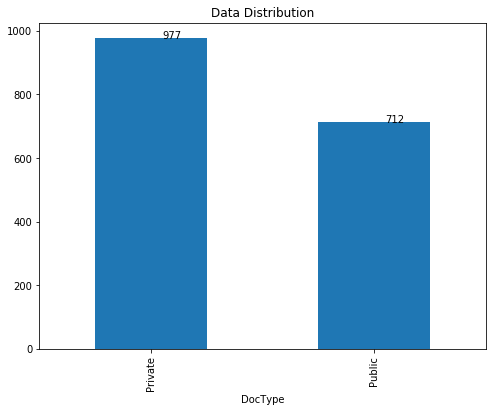

In [84]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
graph = df.groupby('DocType').Text.count().plot.bar(ylim=0)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
graph.set_title('Data Distribution') 
plt.show()

In [85]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Text'],df['DocType_id'],test_size=0.2)
print('Train_X: ', Train_X.shape[0])
print('Train_Y: ', Train_Y.shape[0])
print('Test_X :  ', Test_X.shape[0])
print('Test_Y :  ', Test_Y.shape[0])

Train_X:  1352
Train_Y:  1352
Test_X :   338
Test_Y :   338


In [147]:
print(Train_X.shape)

(1352,)


In [92]:
print(Test_Y)

990     0
1286    0
1384    0
489     1
227     1
       ..
35      1
968     1
1243    0
699     1
207     1
Name: DocType_id, Length: 338, dtype: int64


In [93]:
Train_counts = pd.DataFrame(Train_Y.values, columns = list('a'))
print('Train Data Distribution')
print(Train_counts['a'].value_counts())

Test_counts = pd.DataFrame(Test_Y.values, columns = list('a'))
print('\n\nTest Data Distribution')
print(Test_counts['a'].value_counts())

Train Data Distribution
1    790
0    562
Name: a, dtype: int64


Test Data Distribution
1    187
0    151
Name: a, dtype: int64


In [98]:
Tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
#Learn the vocabulary
Tfidf_vect.fit(df['Text'].values.astype('U'))
Train_X_Tfidf = Tfidf_vect.transform(Train_X.values.astype('U'))
print("Train Data (Text, Features):", Train_X_Tfidf.shape)
Test_X_Tfidf = Tfidf_vect.transform(Test_X.values.astype('U'))
print("Test Data (Text, Features):", Test_X_Tfidf.shape)

Train Data (Text, Features): (1352, 114913)
Test Data (Text, Features): (338, 114913)


In [108]:
df_public = df.loc[df["DocType"]=="Public",:]
df_private = df.loc[df["DocType"]=="Private"]
features_public = Tfidf_vect.fit_transform(df_public.Text.values.astype('U'))
features_private = Tfidf_vect.fit_transform(df_private.Text.values.astype('U'))
labels_public = df_public.DocType_id
labels_private = df_private.DocType_id
print("Features for public train data", features_public.shape)
print("Features for private train data", features_private.shape)

Features for public train data (713, 85141)
Features for private train data (977, 32671)


In [0]:
num_labels = 2
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=114913)
tokenizer.fit_on_texts(Train_X.astype('str'))

 

x_train = tokenizer.texts_to_matrix(Train_X.astype('str'))
x_test = tokenizer.texts_to_matrix(Test_X.astype('str'))
 
encoder = LabelBinarizer()
encoder.fit(Train_Y)
y_train = encoder.transform(Train_Y)
y_test = encoder.transform(Test_Y)

In [149]:
print(x_train.shape)

(1352, 114913)


In [175]:
print(y_test)

[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]


In [0]:
encoder = LabelBinarizer()
encoder.fit(Train_Y)
y_train = encoder.transform(Train_Y)
y_test = encoder.transform(Test_Y)

In [163]:
model = Sequential()
model.add(Dense(32, input_shape=(114913,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 32)                3677248   
_________________________________________________________________
activation_85 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_86 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)               

In [164]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
 
print('Test accuracy:', score[1])
 
text_labels = encoder.classes_
 


338/338 [==============================] - 0s 542us/step
Test accuracy: 0.9970414229398649


In [185]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
 
print('Test accuracy:', score[1])
 
text_labels = encoder.classes_
 
for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    #print(test_files_names.iloc[i])
    print('Actual label:' + y_test[6])
    print("Predicted label: " + predicted_label)

338/338 [==============================] - 0s 541us/step
Test accuracy: 0.9970414229398649


UFuncTypeError: ignored